# Dandiset 000945 Exploration Notebook

This notebook was **AI-generated using dandi-notebook-gen** and has **not been fully scientifically verified**. Please use caution when executing code or interpreting plots and results.

**Dandiset:** Neural Spiking Data in the Awake Rat Somatosensory Cortex Responding to Trials of Transcranial Focused Ultrasound Stimulation

**Description:** Recordings from awake head-fixed rats during transcranial focused ultrasound (tFUS) stimulation. Multi-channel chronic recordings using 32-channel electrodes, tested with different ultrasound pulse repetition frequencies (PRFs). Data includes spike times with cell type labels, trial intervals, and metadata about experimental conditions.

**Dataset Size:** 75 NWB files across multiple subjects and sessions

**Citation:**  
Ramachandran *et al.* (2025), available at: https://dandiarchive.org/dandiset/000945/draft

---

**In this notebook you will learn how to:**
* Retrieve dataset metadata and assets programmatically
* Understand the organization of an example recording
* Access electrode and unit info
* Visualize neuron population composition
* Generate a spike raster plot aligned to trials

---

## Setup
This notebook assumes `pynwb`, `h5py`, `remfile`, `matplotlib`, and `seaborn` are installed.

In [1]:
from dandi.dandiapi import DandiAPIClient

client = DandiAPIClient()
dandiset = client.get_dandiset("000945")
assets = list(dandiset.get_assets())
print(f"Number of assets in Dandiset: {len(assets)}")

for asset in assets[:5]:
    print(asset.identifier, asset.path, asset.size)

print("...")

Number of assets in Dandiset: 75
bbd6a696-a68a-4790-820e-02794bd7829d sub-BH498/sub-BH498_ses-20240306T124227_ecephys.nwb 1674720
d1fa906a-2dc2-4b71-a9e6-26eceafdc21a sub-BH498/sub-BH498_ses-20240305T200606_ecephys.nwb 2555728
845dc047-915e-461b-85de-f029b4c8b16f sub-BH498/sub-BH498_ses-20240305T191833_ecephys.nwb 5586808
76429bc6-027e-4350-8cf3-e8568db28e58 sub-BH498/sub-BH498_ses-20230906T180913_ecephys.nwb 6736848
74cb8afa-730d-425b-bf6b-859c04217cac sub-BH498/sub-BH498_ses-20240305T204552_ecephys.nwb 4293592
...


## Selecting an Example NWB File

For this demo we'll use a representative 12MB file:
`/sub-BH497/sub-BH497_ses-20240310T145814_ecephys.nwb`
accessed via the API download URL.

In [2]:
import remfile
import h5py
import pynwb

url = "https://api.dandiarchive.org/api/assets/f88a9bec-23d6-4444-8b97-8083e45057c9/download/"

file_obj = remfile.File(url)
f = h5py.File(file_obj)
io = pynwb.NWBHDF5IO(file=f)
nwbfile = io.read()

print("NWB Session:", nwbfile.session_description)
print("Subject ID:", nwbfile.subject.subject_id)
print("Recording start time:", nwbfile.session_start_time)
print("Institution:", nwbfile.institution)

NWB Session: Awake S1 Stimulation by tFUS
Subject ID: BH497
Recording start time: 2024-03-10 14:58:14-04:00
Institution: Carnegie Mellon University


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.5.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Metadata: Electrodes

The file contains 32 electrodes grouped under `shank1` targeting somatosensory cortex.

In [3]:
electrodes_table = nwbfile.electrodes
print("Electrode columns:", electrodes_table.colnames)
print("Number of electrodes:", len(electrodes_table.id))
print(electrodes_table.to_dataframe().head())

Electrode columns: ('x', 'y', 'z', 'imp', 'location', 'filtering', 'group', 'group_name')
Number of electrodes: 32
      x     y    z  imp location filtering  \
id                                           
0   1.0  10.0  0.0  NaN  unknown   unknown   
1   1.0  11.0  0.0  NaN  unknown   unknown   
2   1.0   9.0  0.0  NaN  unknown   unknown   
3   1.0   8.0  0.0  NaN  unknown   unknown   
4   1.0   7.0  0.0  NaN  unknown   unknown   

                                                group   group_name  
id                                                                  
0   shank1 pynwb.ecephys.ElectrodeGroup at 0x13970...  shank1elec1  
1   shank1 pynwb.ecephys.ElectrodeGroup at 0x13970...  shank1elec2  
2   shank1 pynwb.ecephys.ElectrodeGroup at 0x13970...  shank1elec3  
3   shank1 pynwb.ecephys.ElectrodeGroup at 0x13970...  shank1elec4  
4   shank1 pynwb.ecephys.ElectrodeGroup at 0x13970...  shank1elec5  


## Metadata: Units and Cell Types

The file contains spike times for **64 units**. Two main cell type labels are present, here represented numerically as "1.0" and "2.0".

In [4]:
units_table = nwbfile.units
print("Unit columns:", units_table.colnames)
print("Number of units:", len(units_table.id))

cell_types = units_table['celltype_label'][:]
cell_types = [ct.decode() if isinstance(ct, bytes) else str(ct) for ct in cell_types]

from collections import Counter
counts = Counter(cell_types)
print("Unit counts by cell type:", counts)

Unit columns: ('spike_times', 'celltype_label')
Number of units: 64
Unit counts by cell type: Counter({'2.0': 33, '1.0': 31})


### Unit Cell Type Distribution

Below is a bar chart indicating relative counts of two identified cell types:

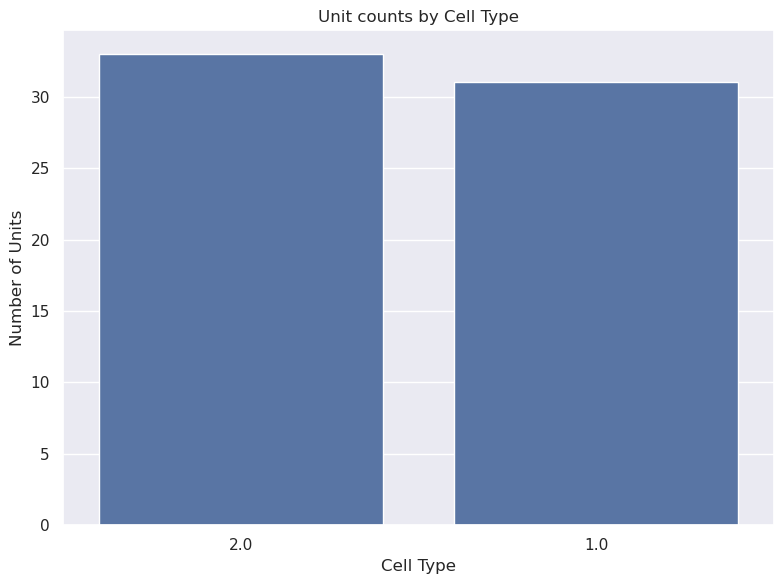

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme()

plt.figure(figsize=(8,6))
sns.barplot(x=list(counts.keys()), y=list(counts.values()))
plt.xlabel("Cell Type")
plt.ylabel("Number of Units")
plt.title("Unit counts by Cell Type")
plt.tight_layout()
plt.show()

## Spike Raster Plot for Example Trials and Units

Next, we visualize spike times from a subset of **around 30 units** over **20 trials**, with trial boundaries shown as vertical dashed lines. This provides intuition into temporal spiking across trials and neurons.

*Note:* This loads only a subset of data for visualization clarity and computational efficiency.

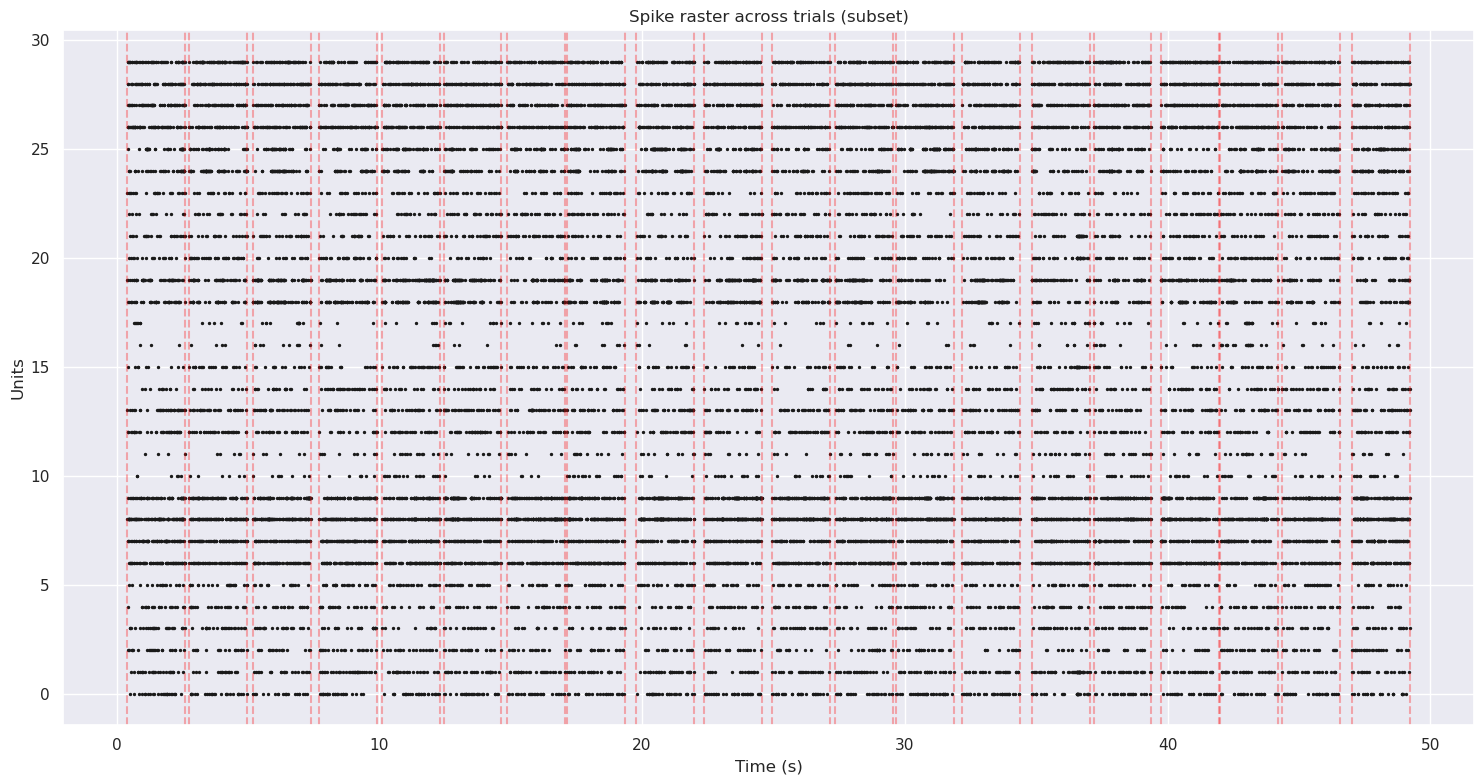

In [6]:
trial_table = nwbfile.trials
trial_start_times = trial_table['start_time'][:]
trial_stop_times = trial_table['stop_time'][:]

max_trials = 20
trial_idxs = range(min(max_trials, len(trial_table.id)))

max_units = 30
unit_idxs = range(min(max_units, len(units_table.id)))

plt.figure(figsize=(15,8))

for j, unit_idx in enumerate(unit_idxs):
    spike_times = units_table['spike_times'][unit_idx]
    mask = np.zeros_like(spike_times, dtype=bool)
    for trial_i in trial_idxs:
        mask |= (spike_times >= trial_start_times[trial_i]) & (spike_times <= trial_stop_times[trial_i])
    selected_spikes = spike_times[mask]
    plt.scatter(selected_spikes, np.full_like(selected_spikes, j), s=2, color='k')

# Draw trial boundaries
for trial_i in trial_idxs:
    plt.axvline(trial_start_times[trial_i], color='red', linestyle='--', alpha=0.3)
    plt.axvline(trial_stop_times[trial_i], color='red', linestyle='--', alpha=0.3)

plt.xlabel("Time (s)")
plt.ylabel("Units")
plt.title("Spike raster across trials (subset)")
plt.tight_layout()
plt.show()

# Summary
- This notebook explored Dandiset 000945, containing multi-electrode neural recordings from awake rats during tFUS stimulation protocols
- We examined recording metadata including subject info, electrodes, and sorted units
- We visualized the distribution of unit cell types
- We generated spike raster plots aligned with stimulation trials

---

**Note:** This notebook serves as a starting point for exploring this dataset. Advanced analyses or scientific conclusions require further domain expertise and statistical validation.